In [8]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image


class HumanDetector:
    def __init__(self):
        self.processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
        self.model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")


    def get_persons(self, path):
        image = Image.open(path)
        inputs = self.processor(images=image, return_tensors="pt")
        outputs = self.model(**inputs)

        # convert outputs (bounding boxes and class logits) to COCO API
        # let's only keep detections with score > 0.9
        target_sizes = torch.tensor([image.size[::-1]])
        results = self.processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]
        count_persons = 0
        for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
          #print(self.model.config.id2label[label.item()])
          if (self.model.config.id2label[label.item()]) == 'person':
            count_persons += 1

        #print(results['labels'])

        return count_persons

In [9]:
detector = HumanDetector()

In [10]:
detector.get_persons('/content/MgUZyHp_gKQ.jpg')

chair
person
chair
person
chair
chair
chair
chair
chair
chair
person
person
person
person
backpack
person
chair
cell phone
person
person
chair
person
person
person
person
person


14

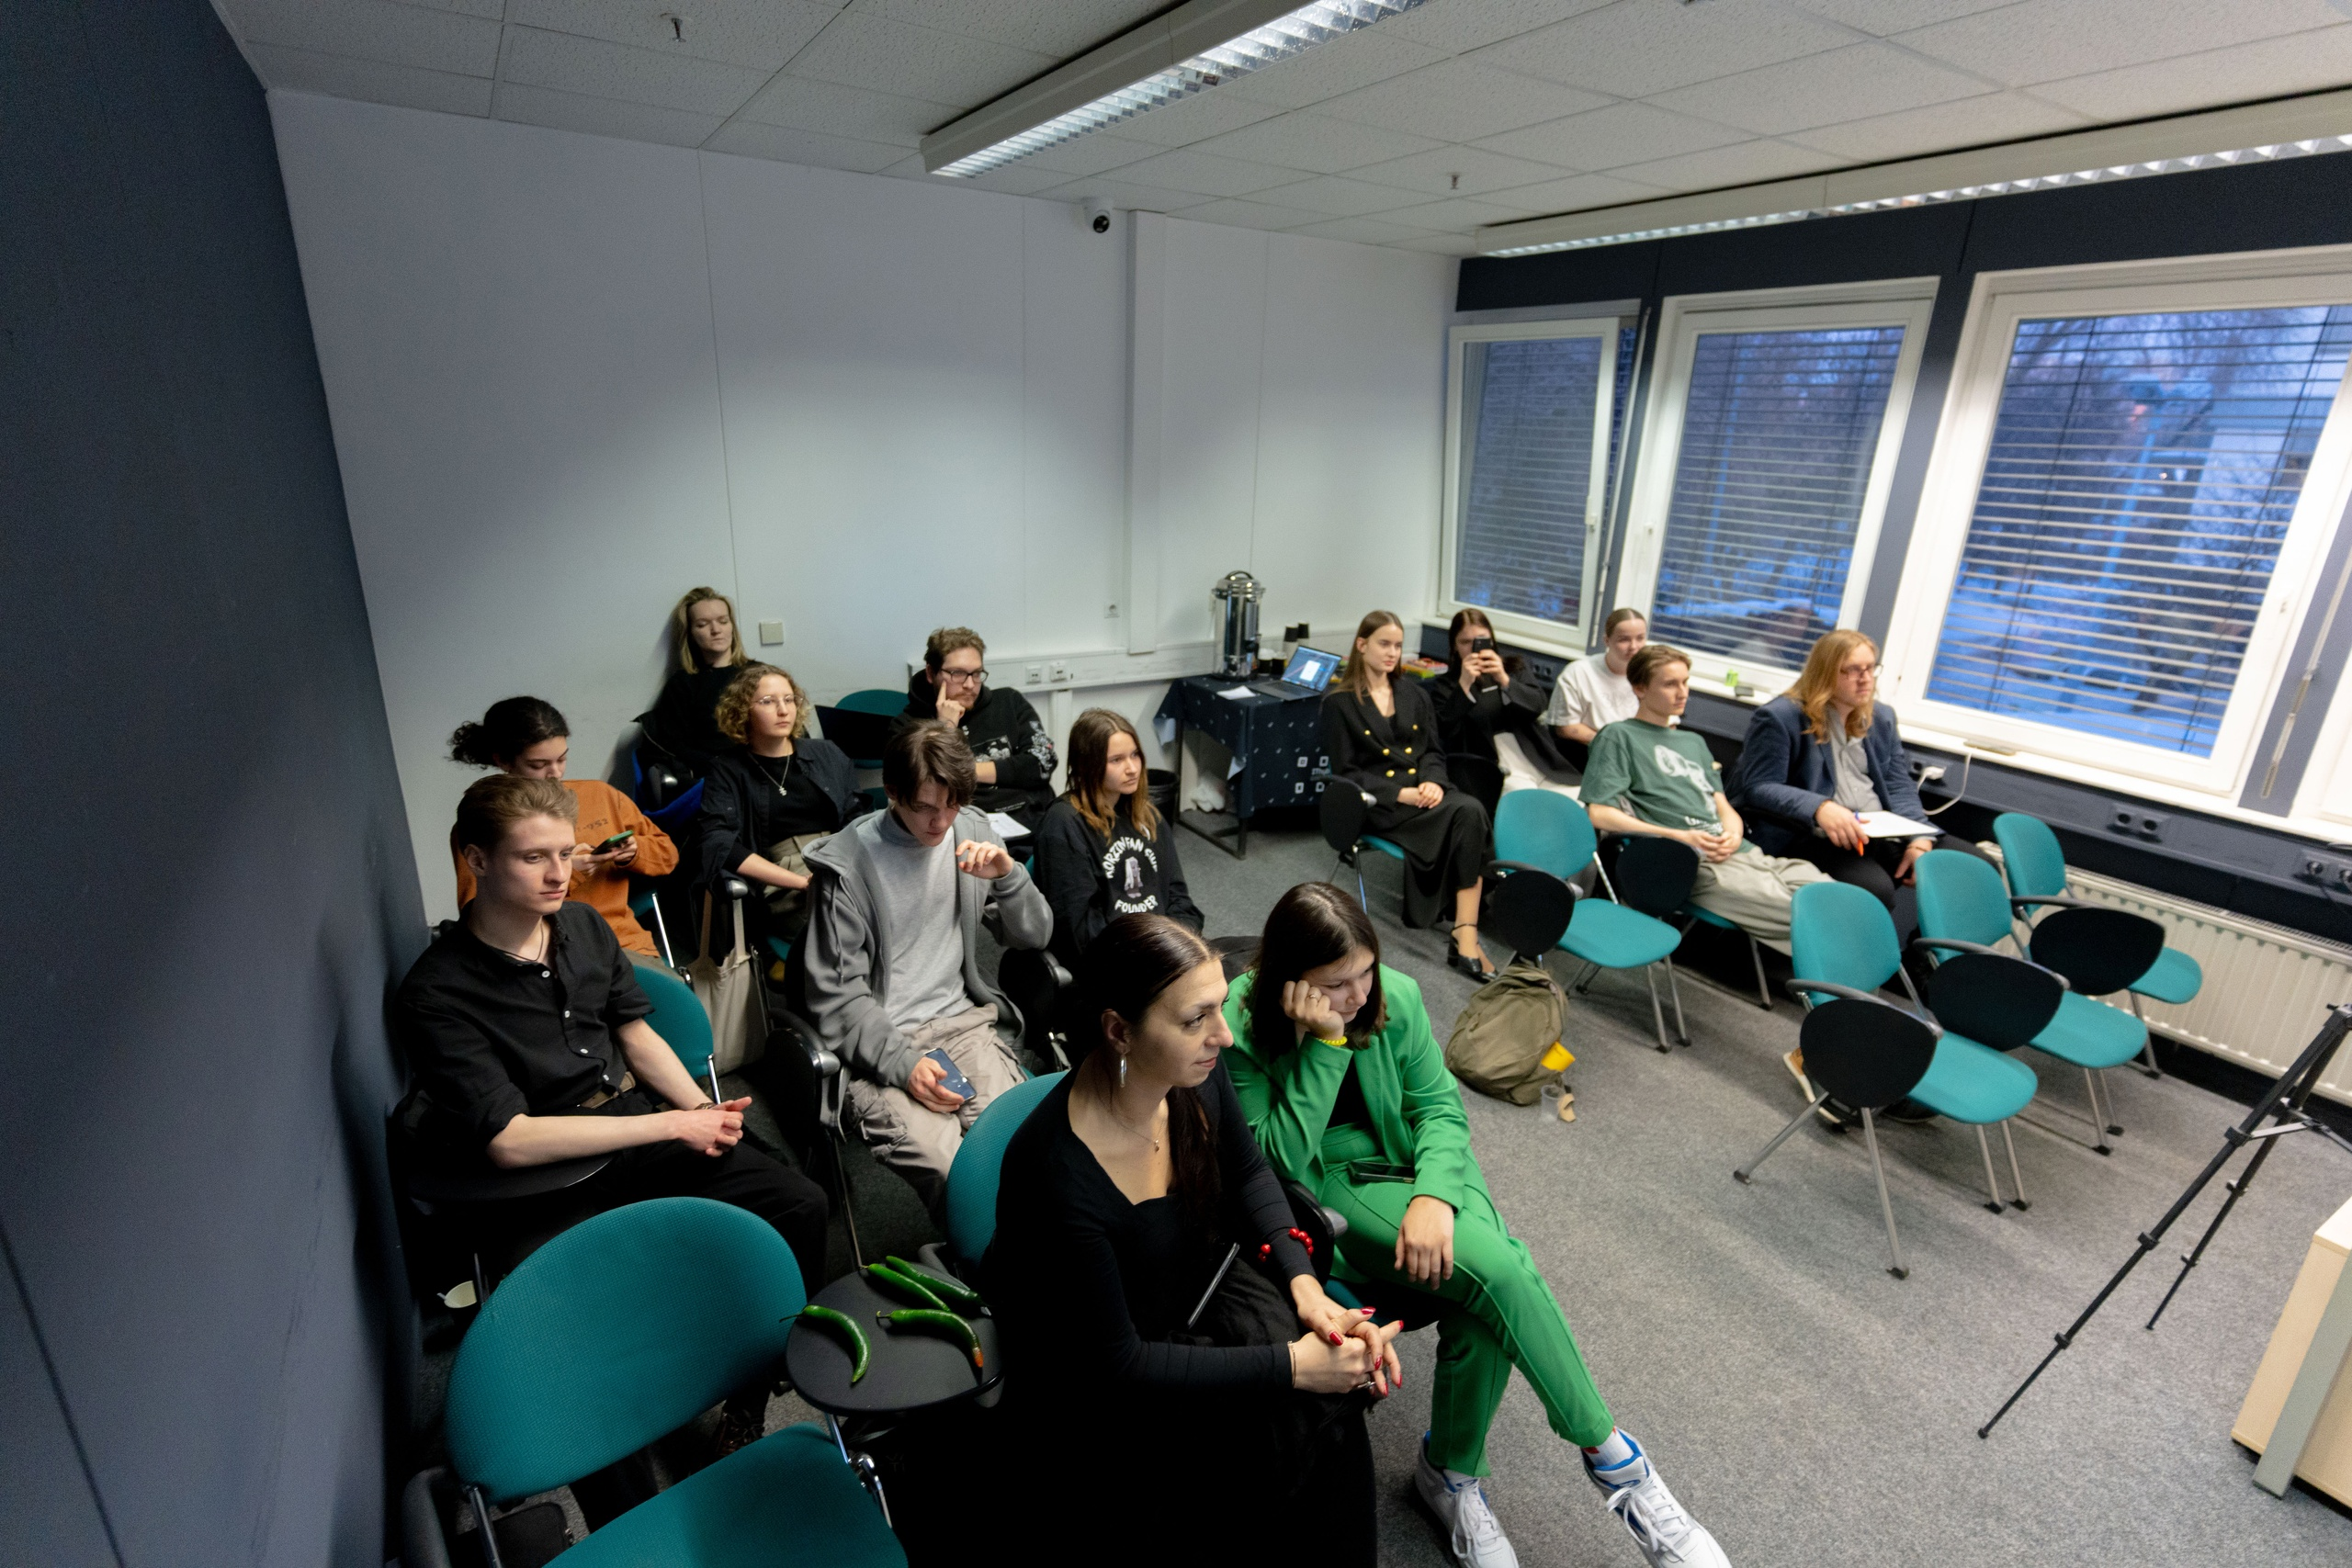

In [4]:
Image.open('/content/MgUZyHp_gKQ.jpg')